In [4]:
import sys, os
HPX_HOME='D:\wkspaces\HyperPixiu'
sys.path.append(HPX_HOME)
sys.path.append(os.path.join(HPX_HOME, 'src'))
# sys.path

In [5]:
from dnn.BaseModel import BaseModel
BaseModel.list_processors()

ImportError: Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "D:\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "D:\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "D:\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 页面文件太小，无法完成操作。


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [1]:
from dnn.Makeups import ModelS2d_VGG16r1

ModuleNotFoundError: No module named 'dnn'

In [ ]:
model = ModelS2d_VGG16r1(input_shape=(18, 32, 4), output_class_num=3, output_name='action')
model.buildup()

In [30]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoded)

In [32]:
# this model maps an input to its encoded representation
encoder = Model(inputs=input_img, outputs=encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

In [33]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [34]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [35]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.3512 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2640 - val_loss: 0.2538
Epoch 3/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2428 - val_loss: 0.2297
Epoch 4/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2207 - val_loss: 0.2103
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2051 - val_loss: 0.1975
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1943 - val_loss: 0.1884
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1863 - val_loss: 0.1813
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1799 - val_loss: 0.1757
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1746 - val_loss: 0.1707
Epoch

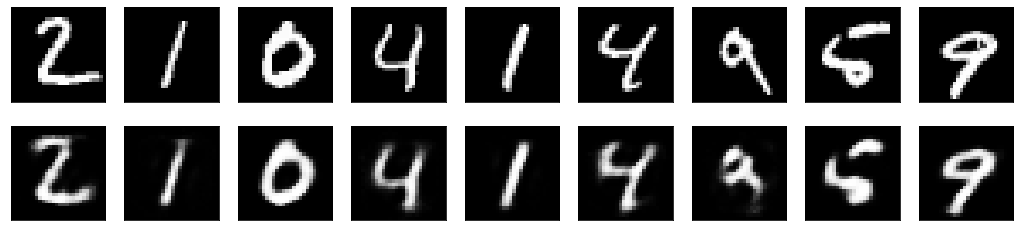

In [37]:
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()